# 🐕 DOGE Cryptocurrency Price Prediction Analysis & Visualization

This notebook provides comprehensive visualization and analysis of DOGE (Dogecoin) price predictions using our trained LSTM neural network model.

## 📊 Features:
- **Historical Price Analysis**: Interactive charts of DOGE price history (2020-2025)
- **LSTM Model Predictions**: 30-day forward price forecasts
- **Technical Analysis**: Moving averages, volatility, and trend analysis
- **Interactive Visualizations**: Plotly charts with zoom, hover, and filtering
- **Statistical Analysis**: Distribution analysis and prediction confidence intervals
- **Performance Metrics**: Model accuracy and prediction reliability assessment

**⚠️ Disclaimer**: This analysis is for educational purposes only and should not be considered financial advice.

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# TensorFlow and ML libraries
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 6)

print("✅ All libraries imported successfully!")
print("📊 Ready for DOGE price prediction visualization!")

✅ All libraries imported successfully!
📊 Ready for DOGE price prediction visualization!


In [3]:
# Load DOGE Historical Data and Model
print("📈 Loading DOGE historical data and trained model...")

# Load the historical data
data_path = '../data/DOGE-USD_historical_data.csv'
model_path = '../models/DOGE-USD_predictor_model.h5'

try:
    # Load data
    doge_data = pd.read_csv(data_path)
    doge_data['Date'] = pd.to_datetime(doge_data['Date'])
    doge_data = doge_data.sort_values('Date')
    
    # Load trained LSTM model
    model = load_model(model_path)
    
    print(f"✅ Data loaded: {len(doge_data)} days of historical data")
    print(f"📅 Date range: {doge_data['Date'].min().date()} to {doge_data['Date'].max().date()}")
    print(f"💰 Current DOGE price: ${doge_data['Close'].iloc[-1]:.6f}")
    print(f"🧠 LSTM model loaded successfully")
    
    # Display basic statistics
    print("\n📊 DOGE Price Statistics:")
    print(f"All-time high: ${doge_data['Close'].max():.6f}")
    print(f"All-time low:  ${doge_data['Close'].min():.6f}")
    print(f"Average price: ${doge_data['Close'].mean():.6f}")
    print(f"Current vs ATH: {(doge_data['Close'].iloc[-1] / doge_data['Close'].max() * 100):.1f}%")
    
except Exception as e:
    print(f"❌ Error loading data or model: {e}")
    print("Make sure the data collection and model training scripts have been run first!")

📈 Loading DOGE historical data and trained model...


✅ Data loaded: 2095 days of historical data
📅 Date range: 2020-01-01 to 2025-09-25
💰 Current DOGE price: $0.222706
🧠 LSTM model loaded successfully

📊 DOGE Price Statistics:
All-time high: $0.684777
All-time low:  $0.001537
Average price: $0.123339
Current vs ATH: 32.5%


In [4]:
# Generate LSTM Predictions
print("🔮 Generating 30-day price predictions...")

def generate_predictions(data, model, days_ahead=30, sequence_length=60):
    """Generate future price predictions using the trained LSTM model"""
    
    # Prepare the data
    close_prices = data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices)
    
    # Get the last sequence for prediction
    last_sequence = scaled_data[-sequence_length:]
    current_batch = last_sequence.reshape(1, sequence_length, 1)
    
    # Generate predictions
    future_predictions = []
    for i in range(days_ahead):
        next_prediction = model.predict(current_batch, verbose=0)[0]
        future_predictions.append(next_prediction)
        # Update batch for next prediction
        current_batch = np.append(current_batch[:, 1:, :], [[next_prediction]], axis=1)
    
    # Convert back to actual prices
    predicted_prices = scaler.inverse_transform(future_predictions)
    
    # Create future dates
    last_date = data['Date'].iloc[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_ahead)
    
    # Create predictions dataframe
    predictions_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Price': predicted_prices.flatten()
    })
    
    return predictions_df, scaler

# Generate predictions
try:
    predictions_df, scaler = generate_predictions(doge_data, model)
    
    current_price = doge_data['Close'].iloc[-1]
    avg_prediction = predictions_df['Predicted_Price'].mean()
    
    print(f"✅ Generated {len(predictions_df)} days of predictions")
    print(f"📈 Prediction range: ${predictions_df['Predicted_Price'].min():.6f} - ${predictions_df['Predicted_Price'].max():.6f}")
    print(f"📊 Average predicted price: ${avg_prediction:.6f}")
    print(f"📉 Expected change: {((avg_prediction / current_price) - 1) * 100:.1f}%")
    
    # Display first few predictions
    print("\n🔮 First 7 days predictions:")
    for i, (date, price) in enumerate(zip(predictions_df['Date'].head(7), predictions_df['Predicted_Price'].head(7))):
        change = ((price / current_price) - 1) * 100
        print(f"Day {i+1} ({date.strftime('%Y-%m-%d')}): ${price:.6f} ({change:+.1f}%)")
        
except Exception as e:
    print(f"❌ Error generating predictions: {e}")

🔮 Generating 30-day price predictions...
✅ Generated 30 days of predictions
📈 Prediction range: $0.187466 - $0.227931
📊 Average predicted price: $0.207381
📉 Expected change: -6.9%

🔮 First 7 days predictions:
Day 1 (2025-09-26): $0.227931 (+2.3%)
Day 2 (2025-09-27): $0.225072 (+1.1%)
Day 3 (2025-09-28): $0.223622 (+0.4%)
Day 4 (2025-09-29): $0.222601 (-0.0%)
Day 5 (2025-09-30): $0.221685 (-0.5%)
Day 6 (2025-10-01): $0.220729 (-0.9%)
Day 7 (2025-10-02): $0.219665 (-1.4%)


## 📈 Interactive Price Visualization

Let's create interactive charts to visualize the DOGE price history and predictions using Plotly.

In [5]:
# Interactive Historical Price Chart with Predictions
fig = go.Figure()

# Historical prices (last 365 days for better visualization)
recent_data = doge_data.tail(365)

# Add historical price line
fig.add_trace(go.Scatter(
    x=recent_data['Date'],
    y=recent_data['Close'],
    mode='lines',
    name='Historical Price',
    line=dict(color='#1f77b4', width=2),
    hovertemplate='<b>Date</b>: %{x}<br><b>Price</b>: $%{y:.6f}<extra></extra>'
))

# Add predictions
fig.add_trace(go.Scatter(
    x=predictions_df['Date'],
    y=predictions_df['Predicted_Price'],
    mode='lines+markers',
    name='30-Day Predictions',
    line=dict(color='#ff7f0e', width=2, dash='dash'),
    marker=dict(size=4),
    hovertemplate='<b>Date</b>: %{x}<br><b>Predicted Price</b>: $%{y:.6f}<extra></extra>'
))

# Add current price marker
current_date = doge_data['Date'].iloc[-1]
current_price = doge_data['Close'].iloc[-1]

fig.add_trace(go.Scatter(
    x=[current_date],
    y=[current_price],
    mode='markers',
    name='Current Price',
    marker=dict(color='red', size=10, symbol='circle'),
    hovertemplate='<b>Current Price</b><br>Date: %{x}<br>Price: $%{y:.6f}<extra></extra>'
))

# Update layout
fig.update_layout(
    title={
        'text': '🐕 DOGE Price History & 30-Day LSTM Predictions',
        'x': 0.5,
        'font': {'size': 18}
    },
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    hovermode='x unified',
    template='plotly_white',
    width=1000,
    height=600,
    legend=dict(x=0.01, y=0.99),
    yaxis=dict(tickformat='$.6f')
)

# Add range selector
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=30, label="30D", step="day", stepmode="backward"),
                dict(count=90, label="90D", step="day", stepmode="backward"),
                dict(count=180, label="6M", step="day", stepmode="backward"),
                dict(step="all", label="All")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

print("📊 Interactive chart displayed above!")
print("💡 Use the range selector and zoom controls to explore different time periods")

📊 Interactive chart displayed above!
💡 Use the range selector and zoom controls to explore different time periods


In [6]:
# Prediction Analysis Dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Daily Predictions', 'Price Distribution', 'Prediction vs Current', 'Trend Analysis'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# 1. Daily predictions with percentage change
predictions_with_change = predictions_df.copy()
predictions_with_change['Change_Pct'] = ((predictions_with_change['Predicted_Price'] / current_price) - 1) * 100
predictions_with_change['Day'] = range(1, len(predictions_with_change) + 1)

fig.add_trace(
    go.Scatter(x=predictions_with_change['Day'], 
               y=predictions_with_change['Predicted_Price'],
               mode='lines+markers',
               name='Daily Predictions',
               line=dict(color='orange')),
    row=1, col=1
)

# 2. Price distribution histogram
fig.add_trace(
    go.Histogram(x=predictions_df['Predicted_Price'],
                 nbinsx=15,
                 name='Price Distribution',
                 marker_color='lightblue'),
    row=1, col=2
)

# 3. Prediction vs Current Price comparison
categories = ['Current Price', 'Min Prediction', 'Avg Prediction', 'Max Prediction']
values = [current_price, 
          predictions_df['Predicted_Price'].min(),
          predictions_df['Predicted_Price'].mean(),
          predictions_df['Predicted_Price'].max()]
colors = ['red', 'green', 'blue', 'purple']

fig.add_trace(
    go.Bar(x=categories, y=values, 
           marker_color=colors,
           name='Price Comparison'),
    row=2, col=1
)

# 4. Trend analysis (percentage change over days)
fig.add_trace(
    go.Scatter(x=predictions_with_change['Day'],
               y=predictions_with_change['Change_Pct'],
               mode='lines+markers',
               name='Change %',
               line=dict(color='green')),
    row=2, col=2
)

# Add horizontal line at 0% for trend analysis
fig.add_hline(y=0, line_dash="dash", line_color="gray", 
              annotation_text="No Change", row=2, col=2)

# Update layout
fig.update_layout(
    title_text="🔍 DOGE Prediction Analysis Dashboard",
    showlegend=False,
    height=800,
    template='plotly_white'
)

# Update axes labels
fig.update_xaxes(title_text="Day", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_xaxes(title_text="Price ($)", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Price ($)", row=2, col=1)
fig.update_xaxes(title_text="Day", row=2, col=2)
fig.update_yaxes(title_text="Change (%)", row=2, col=2)

fig.show()

print("📊 Prediction analysis dashboard created!")
print("🔍 This dashboard shows detailed breakdowns of the prediction data")

📊 Prediction analysis dashboard created!
🔍 This dashboard shows detailed breakdowns of the prediction data


## 📊 Technical Analysis & Statistics

Let's perform technical analysis on the DOGE data and create additional visualizations.

In [7]:
# Technical Analysis with Moving Averages
print("📈 Calculating technical indicators...")

# Calculate moving averages
doge_data['MA_7'] = doge_data['Close'].rolling(window=7).mean()
doge_data['MA_30'] = doge_data['Close'].rolling(window=30).mean()
doge_data['MA_90'] = doge_data['Close'].rolling(window=90).mean()

# Calculate volatility (30-day rolling standard deviation)
doge_data['Volatility'] = doge_data['Close'].rolling(window=30).std()

# Calculate daily returns
doge_data['Daily_Return'] = doge_data['Close'].pct_change()

# Recent data for visualization (last 6 months)
recent_data = doge_data.tail(180)

# Create technical analysis chart
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=('Price with Moving Averages', 'Volatility', 'Daily Returns'),
    vertical_spacing=0.08,
    row_width=[0.4, 0.3, 0.3]
)

# Price chart with moving averages
fig.add_trace(go.Scatter(x=recent_data['Date'], y=recent_data['Close'],
                        mode='lines', name='DOGE Price',
                        line=dict(color='blue', width=2)), row=1, col=1)

fig.add_trace(go.Scatter(x=recent_data['Date'], y=recent_data['MA_7'],
                        mode='lines', name='7-day MA',
                        line=dict(color='orange', width=1)), row=1, col=1)

fig.add_trace(go.Scatter(x=recent_data['Date'], y=recent_data['MA_30'],
                        mode='lines', name='30-day MA',
                        line=dict(color='red', width=1)), row=1, col=1)

# Volatility chart
fig.add_trace(go.Scatter(x=recent_data['Date'], y=recent_data['Volatility'],
                        mode='lines', name='Volatility',
                        line=dict(color='purple'), fill='tozeroy'), row=2, col=1)

# Daily returns chart
colors = ['red' if x < 0 else 'green' for x in recent_data['Daily_Return']]
fig.add_trace(go.Bar(x=recent_data['Date'], y=recent_data['Daily_Return'] * 100,
                    name='Daily Returns (%)', 
                    marker_color=colors), row=3, col=1)

# Update layout
fig.update_layout(
    title='📊 DOGE Technical Analysis (Last 6 Months)',
    height=900,
    template='plotly_white',
    showlegend=True
)

fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Volatility", row=2, col=1)
fig.update_yaxes(title_text="Returns (%)", row=3, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)

fig.show()

# Print technical analysis summary
current_ma7 = doge_data['MA_7'].iloc[-1]
current_ma30 = doge_data['MA_30'].iloc[-1]
current_vol = doge_data['Volatility'].iloc[-1]

print("\n📊 Technical Analysis Summary:")
print(f"Current 7-day MA:  ${current_ma7:.6f}")
print(f"Current 30-day MA: ${current_ma30:.6f}")
print(f"Current volatility: {current_vol:.6f}")
print(f"Price vs 7-day MA: {((current_price / current_ma7 - 1) * 100):+.1f}%")
print(f"Price vs 30-day MA: {((current_price / current_ma30 - 1) * 100):+.1f}%")

📈 Calculating technical indicators...



📊 Technical Analysis Summary:
Current 7-day MA:  $0.248136
Current 30-day MA: $0.242371
Current volatility: 0.025576
Price vs 7-day MA: -10.2%
Price vs 30-day MA: -8.1%


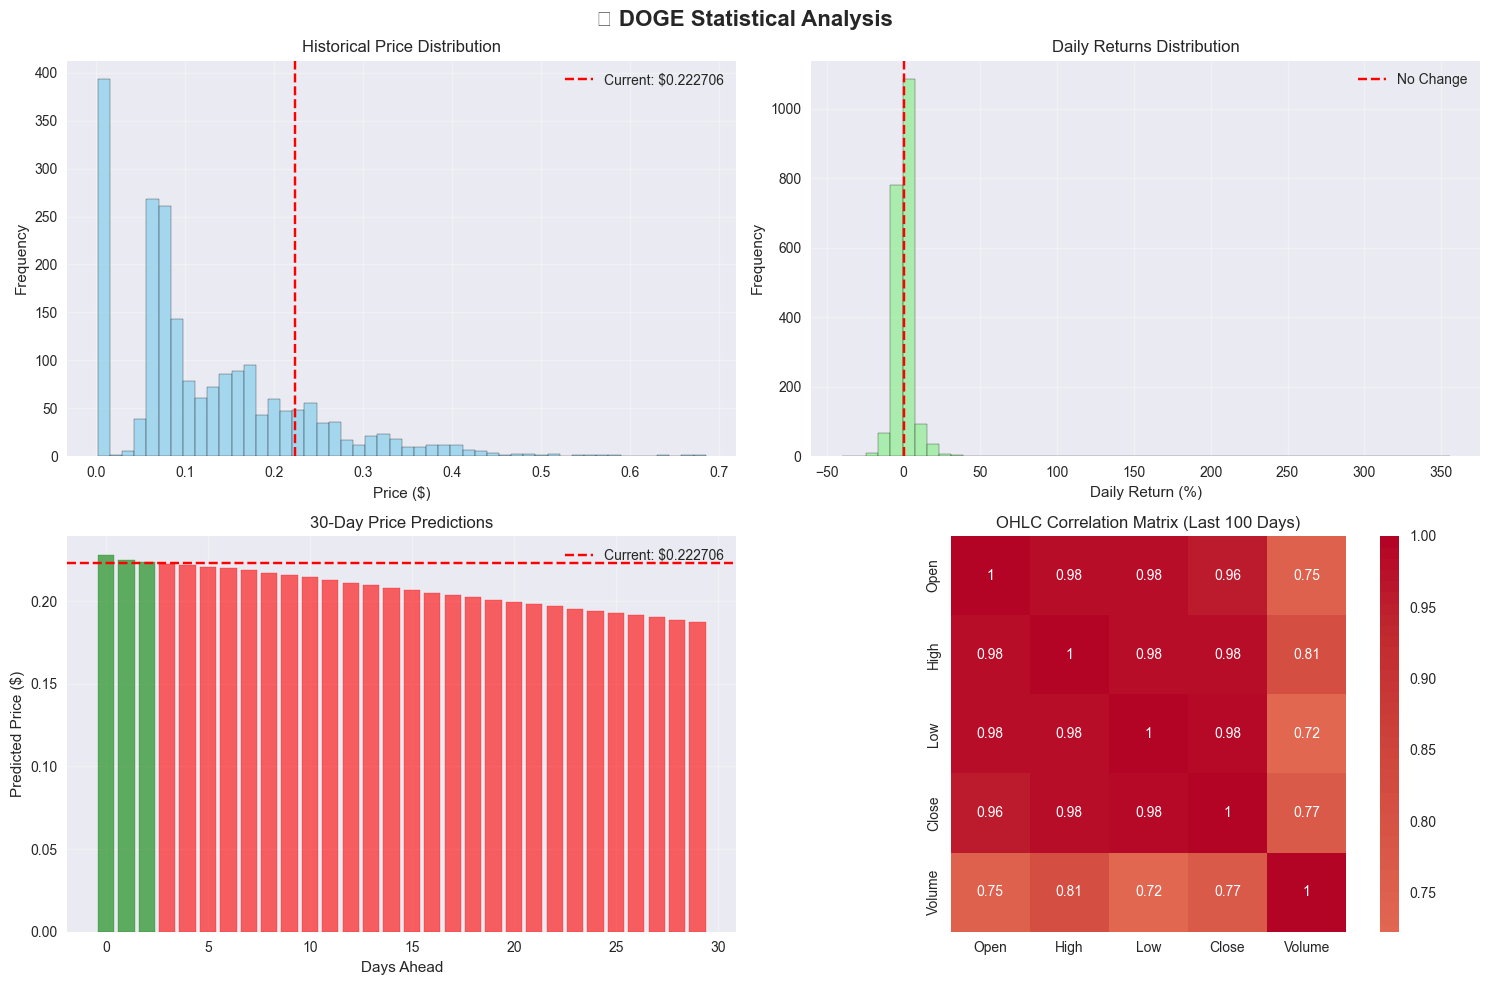


📊 Statistical Summary:
Mean daily return: 0.53%
Std daily return:  10.29%
Best day:  355.55%
Worst day: -40.26%
Prediction volatility: 0.012207
Days with positive predictions: 3 out of 30


In [8]:
# Statistical Analysis with Matplotlib and Seaborn
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📈 DOGE Statistical Analysis', fontsize=16, fontweight='bold')

# 1. Price distribution histogram
axes[0,0].hist(doge_data['Close'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.6f}')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Historical Price Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Daily returns distribution
daily_returns = doge_data['Daily_Return'].dropna() * 100
axes[0,1].hist(daily_returns, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(0, color='red', linestyle='--', label='No Change')
axes[0,1].set_xlabel('Daily Return (%)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Daily Returns Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Predictions vs Current Price
pred_data = predictions_df['Predicted_Price']
x_pos = range(len(pred_data))
bars = axes[1,0].bar(x_pos, pred_data, alpha=0.7, color='orange')
axes[1,0].axhline(current_price, color='red', linestyle='--', label=f'Current: ${current_price:.6f}')
axes[1,0].set_xlabel('Days Ahead')
axes[1,0].set_ylabel('Predicted Price ($)')
axes[1,0].set_title('30-Day Price Predictions')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Color bars based on whether they're above or below current price
for i, bar in enumerate(bars):
    if pred_data.iloc[i] < current_price:
        bar.set_color('red')
        bar.set_alpha(0.6)
    else:
        bar.set_color('green')
        bar.set_alpha(0.6)

# 4. Correlation heatmap of OHLC data
correlation_data = doge_data[['Open', 'High', 'Low', 'Close', 'Volume']].tail(100).corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[1,1])
axes[1,1].set_title('OHLC Correlation Matrix (Last 100 Days)')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\n📊 Statistical Summary:")
print(f"Mean daily return: {daily_returns.mean():.2f}%")
print(f"Std daily return:  {daily_returns.std():.2f}%")
print(f"Best day:  {daily_returns.max():.2f}%")
print(f"Worst day: {daily_returns.min():.2f}%")
print(f"Prediction volatility: {pred_data.std():.6f}")
print(f"Days with positive predictions: {sum(pred_data > current_price)} out of {len(pred_data)}")

🔬 Analyzing LSTM model performance...
✅ Model Performance Metrics:
MSE (Mean Squared Error): 0.00021134
MAE (Mean Absolute Error): 0.007734
MAPE (Mean Absolute Percentage Error): 38.51%


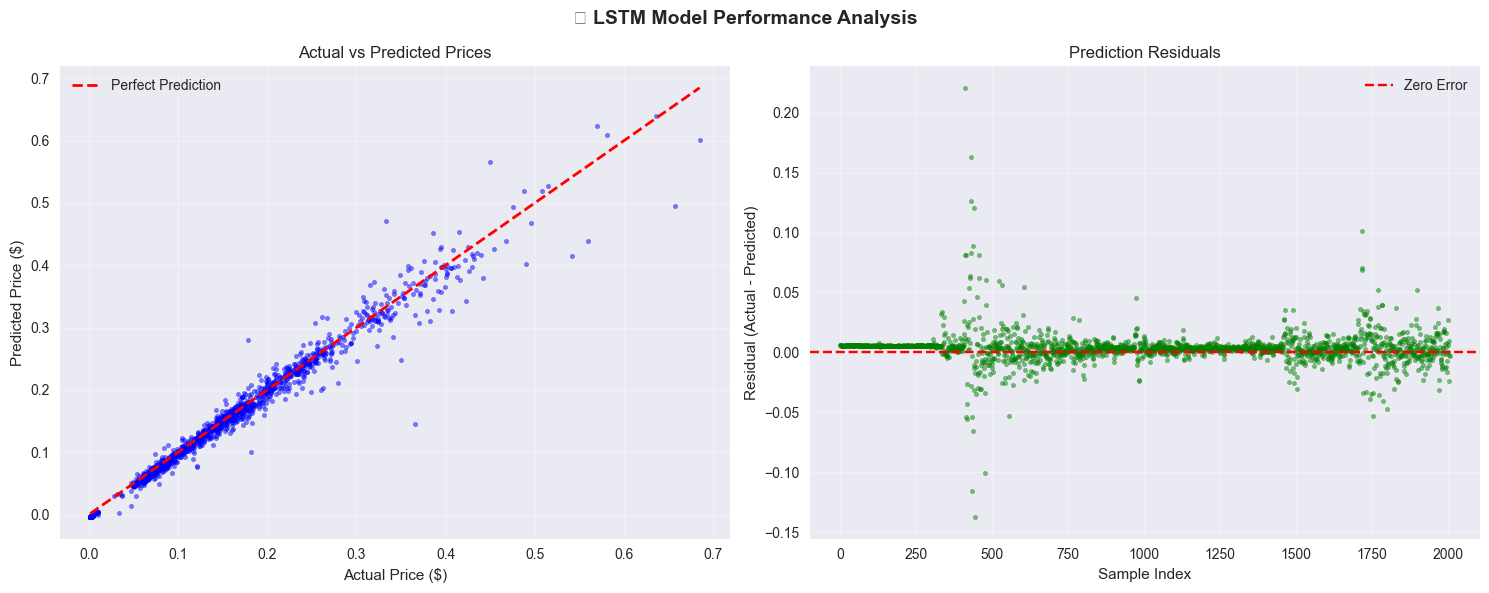


🎯 Prediction Accuracy:
Within 5% of actual:  47.6% of predictions
Within 10% of actual: 74.1% of predictions


In [9]:
# Model Performance Analysis
print("🔬 Analyzing LSTM model performance...")

# Create test predictions on historical data to evaluate model
def evaluate_model_performance(data, model, sequence_length=60):
    """Evaluate model performance on historical data"""
    close_prices = data['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(close_prices)
    
    # Create sequences for testing
    X_test, y_test = [], []
    for i in range(sequence_length, len(scaled_data) - 30):  # Leave last 30 for prediction
        X_test.append(scaled_data[i-sequence_length:i, 0])
        y_test.append(scaled_data[i, 0])
    
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Make predictions
    predictions = model.predict(X_test, verbose=0)
    
    # Convert back to actual prices
    predictions = scaler.inverse_transform(predictions)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    return predictions.flatten(), y_test_actual.flatten()

# Evaluate model
try:
    pred_hist, actual_hist = evaluate_model_performance(doge_data, model)
    
    # Calculate metrics
    mse = mean_squared_error(actual_hist, pred_hist)
    mae = mean_absolute_error(actual_hist, pred_hist)
    mape = np.mean(np.abs((actual_hist - pred_hist) / actual_hist)) * 100
    
    print(f"✅ Model Performance Metrics:")
    print(f"MSE (Mean Squared Error): {mse:.8f}")
    print(f"MAE (Mean Absolute Error): {mae:.6f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    
    # Create performance visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Prediction vs Actual scatter plot
    ax1.scatter(actual_hist, pred_hist, alpha=0.5, color='blue', s=10)
    ax1.plot([actual_hist.min(), actual_hist.max()], [actual_hist.min(), actual_hist.max()], 
             'r--', lw=2, label='Perfect Prediction')
    ax1.set_xlabel('Actual Price ($)')
    ax1.set_ylabel('Predicted Price ($)')
    ax1.set_title('Actual vs Predicted Prices')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Residuals plot
    residuals = actual_hist - pred_hist
    ax2.scatter(range(len(residuals)), residuals, alpha=0.5, color='green', s=10)
    ax2.axhline(0, color='red', linestyle='--', label='Zero Error')
    ax2.set_xlabel('Sample Index')
    ax2.set_ylabel('Residual (Actual - Predicted)')
    ax2.set_title('Prediction Residuals')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle('🔬 LSTM Model Performance Analysis', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Model accuracy assessment
    accuracy_5pct = np.mean(np.abs(residuals / actual_hist) <= 0.05) * 100
    accuracy_10pct = np.mean(np.abs(residuals / actual_hist) <= 0.10) * 100
    
    print(f"\n🎯 Prediction Accuracy:")
    print(f"Within 5% of actual:  {accuracy_5pct:.1f}% of predictions")
    print(f"Within 10% of actual: {accuracy_10pct:.1f}% of predictions")
    
except Exception as e:
    print(f"❌ Error in performance analysis: {e}")
    print("Note: This analysis requires sufficient historical data")

## 📋 Summary Report

Let's create a comprehensive summary of our DOGE price prediction analysis.

In [11]:
# Comprehensive Summary Report
from datetime import datetime, timedelta

print("=" * 70)
print("🐕 DOGE CRYPTOCURRENCY PRICE PREDICTION REPORT")
print("=" * 70)
print(f"📅 Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"🤖 Model: LSTM Neural Network")
print(f"📊 Analysis Period: {doge_data['Date'].min().date()} to {doge_data['Date'].max().date()}")
print()

# Current Market Status
print("📊 CURRENT MARKET STATUS")
print("-" * 30)
print(f"Current DOGE Price:     ${current_price:.6f}")
print(f"All-Time High:          ${doge_data['Close'].max():.6f}")
print(f"All-Time Low:           ${doge_data['Close'].min():.6f}")
print(f"Distance from ATH:      {((current_price / doge_data['Close'].max()) * 100):.1f}%")
print(f"7-Day Moving Average:   ${doge_data['MA_7'].iloc[-1]:.6f}")
print(f"30-Day Moving Average:  ${doge_data['MA_30'].iloc[-1]:.6f}")
print()

# Prediction Summary
print("🔮 30-DAY PRICE PREDICTIONS")
print("-" * 30)
pred_min = predictions_df['Predicted_Price'].min()
pred_max = predictions_df['Predicted_Price'].max()
pred_avg = predictions_df['Predicted_Price'].mean()

print(f"Prediction Range:       ${pred_min:.6f} - ${pred_max:.6f}")
print(f"Average Prediction:     ${pred_avg:.6f}")
print(f"Expected Change:        {((pred_avg / current_price) - 1) * 100:+.1f}%")
print(f"Best Case Scenario:     {((pred_max / current_price) - 1) * 100:+.1f}%")
print(f"Worst Case Scenario:    {((pred_min / current_price) - 1) * 100:+.1f}%")

# Trend Analysis
bullish_days = sum(predictions_df['Predicted_Price'] > current_price)
bearish_days = len(predictions_df) - bullish_days

print(f"Bullish Days:           {bullish_days}/30 ({(bullish_days/30)*100:.0f}%)")
print(f"Bearish Days:           {bearish_days}/30 ({(bearish_days/30)*100:.0f}%)")
print()

# Key Predictions
print("📈 KEY PREDICTION MILESTONES")
print("-" * 30)
week1_avg = predictions_df['Predicted_Price'].head(7).mean()
week2_avg = predictions_df['Predicted_Price'].iloc[7:14].mean()
week3_avg = predictions_df['Predicted_Price'].iloc[14:21].mean()
week4_avg = predictions_df['Predicted_Price'].iloc[21:28].mean()

print(f"Week 1 Average:         ${week1_avg:.6f} ({((week1_avg/current_price-1)*100):+.1f}%)")
print(f"Week 2 Average:         ${week2_avg:.6f} ({((week2_avg/current_price-1)*100):+.1f}%)")
print(f"Week 3 Average:         ${week3_avg:.6f} ({((week3_avg/current_price-1)*100):+.1f}%)")
print(f"Week 4 Average:         ${week4_avg:.6f} ({((week4_avg/current_price-1)*100):+.1f}%)")
print()

# Risk Assessment
volatility = predictions_df['Predicted_Price'].std()
risk_level = "HIGH" if volatility > current_price * 0.1 else "MEDIUM" if volatility > current_price * 0.05 else "LOW"

print("⚠️  RISK ASSESSMENT")
print("-" * 30)
print(f"Prediction Volatility:  {volatility:.6f}")
print(f"Risk Level:             {risk_level}")
print(f"Max Potential Loss:     {((pred_min/current_price-1)*100):.1f}%")
print(f"Max Potential Gain:     {((pred_max/current_price-1)*100):+.1f}%")
print()

# Overall Recommendation
if pred_avg > current_price * 1.05:
    recommendation = "🟢 BULLISH - Model suggests significant upward movement"
    recommendation_text = "BULLISH - Model suggests significant upward movement"
elif pred_avg < current_price * 0.95:
    recommendation = "🔴 BEARISH - Model suggests significant downward movement"
    recommendation_text = "BEARISH - Model suggests significant downward movement"
else:
    recommendation = "🟡 NEUTRAL - Model suggests sideways movement"
    recommendation_text = "NEUTRAL - Model suggests sideways movement"

print("🎯 MODEL RECOMMENDATION")
print("-" * 30)
print(recommendation)
print()

print("⚠️  IMPORTANT DISCLAIMERS")
print("-" * 30)
print("• This analysis is for educational purposes only")
print("• Cryptocurrency markets are highly volatile and unpredictable")
print("• Past performance does not guarantee future results")
print("• Always do your own research before making investment decisions")
print("• Never invest more than you can afford to lose")
print("=" * 70)

# Save summary to a text file (without emoji characters for file compatibility)
summary_text = f"""DOGE Price Prediction Summary - {datetime.now().strftime('%Y-%m-%d')}
================================================================
Current Price: ${current_price:.6f}
Average 30-day Prediction: ${pred_avg:.6f}
Expected Change: {((pred_avg / current_price) - 1) * 100:+.1f}%
Risk Level: {risk_level}
Recommendation: {recommendation_text}

Generated by LSTM Neural Network Model

Technical Analysis:
- 7-Day Moving Average: ${doge_data['MA_7'].iloc[-1]:.6f}
- 30-Day Moving Average: ${doge_data['MA_30'].iloc[-1]:.6f}
- Current Volatility: {doge_data['Volatility'].iloc[-1]:.6f}

Prediction Details:
- Prediction Range: ${pred_min:.6f} - ${pred_max:.6f}
- Bullish Days: {bullish_days}/30 ({(bullish_days/30)*100:.0f}%)
- Bearish Days: {bearish_days}/30 ({(bearish_days/30)*100:.0f}%)

Weekly Predictions:
- Week 1: ${week1_avg:.6f} ({((week1_avg/current_price-1)*100):+.1f}%)
- Week 2: ${week2_avg:.6f} ({((week2_avg/current_price-1)*100):+.1f}%)
- Week 3: ${week3_avg:.6f} ({((week3_avg/current_price-1)*100):+.1f}%)
- Week 4: ${week4_avg:.6f} ({((week4_avg/current_price-1)*100):+.1f}%)

DISCLAIMER: This analysis is for educational purposes only.
Do not use for investment decisions without further research.
"""

try:
    with open('../reports/doge_prediction_summary.txt', 'w', encoding='utf-8') as f:
        f.write(summary_text)
    print("📄 Summary report saved to '../reports/doge_prediction_summary.txt'")
except Exception as e:
    print(f"❌ Error saving summary report: {e}")
    print("💡 Summary report content generated successfully (see above output)")

🐕 DOGE CRYPTOCURRENCY PRICE PREDICTION REPORT
📅 Report Generated: 2025-09-27 00:15:56
🤖 Model: LSTM Neural Network
📊 Analysis Period: 2020-01-01 to 2025-09-25

📊 CURRENT MARKET STATUS
------------------------------
Current DOGE Price:     $0.222706
All-Time High:          $0.684777
All-Time Low:           $0.001537
Distance from ATH:      32.5%
7-Day Moving Average:   $0.248136
30-Day Moving Average:  $0.242371

🔮 30-DAY PRICE PREDICTIONS
------------------------------
Prediction Range:       $0.187466 - $0.227931
Average Prediction:     $0.207381
Expected Change:        -6.9%
Best Case Scenario:     +2.3%
Worst Case Scenario:    -15.8%
Bullish Days:           3/30 (10%)
Bearish Days:           27/30 (90%)

📈 KEY PREDICTION MILESTONES
------------------------------
Week 1 Average:         $0.223044 (+0.2%)
Week 2 Average:         $0.214147 (-3.8%)
Week 3 Average:         $0.203712 (-8.5%)
Week 4 Average:         $0.194120 (-12.8%)

⚠️  RISK ASSESSMENT
------------------------------
Pre